In [2]:
import os
import random
import sys

## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display as display 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls
import seaborn as sns


import tensorflow as tf
#py.init_notebook_mode(connected=True)


import moviepy.editor as mp


# from skimage.restoration import denoise_wavelet
## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile as wav
from tqdm import tqdm

# from IPython.display import Audio
import matplotlib.pyplot as plt
    
input_duration=3


In [3]:
from glob import glob

#NOTE: the word 'normal' used in this notebook doesn't imply a normal distribution, is just used to denote non-anomalous examples

#directories of normal and abnormal audios
# norm_data_dir = './normals/'
# norm_audio_files = glob(norm_data_dir  + '*.wav')


from pydub import AudioSegment

# norm_data_dir = os.listdir('./Documents/FYP/normals-1/') 
# norm_audio_files = glob(norm_data_dir  + '*.wav')
# norm_audio_files.sort()

norm_data_dir = './Documents/FYP/normals-1/' 
norm_audio_files = glob(norm_data_dir  + '*.wav')
# norm_audio_files.sort()


# abnorm_data_dir = './audio-processing-files/abnormals/'
# abnorm_audio_files = glob(abnorm_data_dir + '*.mp3')

'''
WARNING : 
    glob library doesn't retrieve files on specific order. Be sure to control the order when retrieving
    production data in order to ensure a reproducible model.
'''

print(f'Number of normal audios : {len(norm_audio_files)}')
#print(f'Number of abnormal audios : {len(abnorm_audio_files )}')

Number of normal audios : 20


In [4]:
import librosa
from librosa import feature
import numpy as np

fn_list_i = [
    feature.chroma_stft,
    feature.spectral_centroid,
    feature.spectral_bandwidth,
    feature.spectral_rolloff
]
  
fn_list_ii = [
    feature.rms,
    feature.zero_crossing_rate
]

def get_feature_vector(y,sr):  
  feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
  feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii]
  
  feature_vector =   feat_vect_i + feat_vect_ii  
  return feature_vector

In [5]:
#build the matrix with normal audios featurized
norm_audios_feat = []
for file in norm_audio_files:
  '''
  y is the time series array of the audio file, a 1D np.ndarray
  sr is the sampling rate, a number
  '''  
  y,sr = librosa.load(file,sr=None)   
  feature_vector = get_feature_vector(y, sr) 
  norm_audios_feat.append(feature_vector)  
  print('.', end= " ")

. . . . . . . . . . . . . . . . . . . . 

In [6]:
print(norm_audios_feat)

[[0.4142941, 1233.639255372995, 1750.8491175751305, 2149.82023612081, 0.066632785, 0.025105631900106413], [0.3546235, 1141.1111638493205, 1437.6814726954797, 1834.7451601982698, 0.06419712, 0.03018543389740207], [0.3621566, 1181.7682304428506, 1519.7508170793778, 1976.7517364364692, 0.06776216, 0.028657894824908974], [0.3834721, 1259.3692403309917, 1656.4936690021254, 2181.204058426395, 0.06290981, 0.02768332520342079], [0.438414, 2728.0471899167655, 3554.688546837032, 4788.107259825328, 0.016356325, 0.06255543804585152], [0.3935652, 1269.4410460373758, 1675.6932186481204, 2118.5846377896382, 0.059193227, 0.029370479489390783], [0.35152534, 1860.427105514682, 2086.24616684027, 3512.5151780895844, 0.028522966, 0.060978607325957904], [0.3567272, 2033.204582963478, 2204.8602530134426, 3882.264714596089, 0.03044564, 0.06715794401993219], [0.3679018, 1210.4015486819765, 1526.390470396767, 2031.0637226724823, 0.06445375, 0.0317036683038988], [0.35012034, 2013.8315748003683, 2167.682956552558

In [7]:
import csv

norm_output = './Documents/FYP/normals_00.csv'
#abnorm_output = 'abnormals_00.csv'

header =[
    'id'
    'chroma_stft',
    'spectral_centroid',
    'spectral_bandwidth',
    'spectral_rolloff',
    'rmse',
    'zero_crossing_rate'
]

#WARNING : this overwrites the file each time. Be aware of this because feature extraction step takes time.
with open(norm_output,'+w') as f:
  csv_writer = csv.writer(f, delimiter = ',')
  csv_writer.writerow(header)
  csv_writer.writerows(norm_audios_feat)

# with open(abnorm_output,'+w') as f:
#   csv_writer = csv.writer(f, delimiter = ',')
#   csv_writer.writerow(header)
#   csv_writer.writerows(abnorm_audios_feat)

In [9]:
fn = './Documents/FYP/normals-1/Paragraph 1.wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 44100
Librosa sample rate: 22050


In [12]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio)
                                                           np.max(scipy_audio)))print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio)
                                                           np.max(librosa_audio)))

SyntaxError: invalid syntax (<ipython-input-12-65f7dad2fe4c>, line 2)

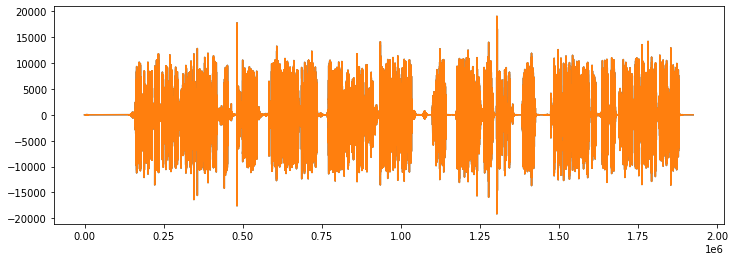

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.savefig('original_audio.png')
plt.show('original_audi')

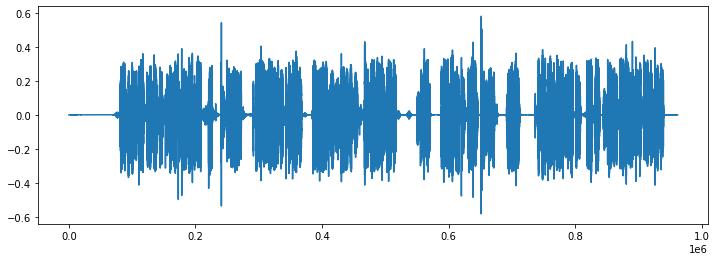

In [14]:
# Librosa: mono track
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)
plt.savefig('librosa_audio.png')
plt.show('librosa_audio')

In [19]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)

In [20]:
print(mfccs.shape)

(40, 1880)


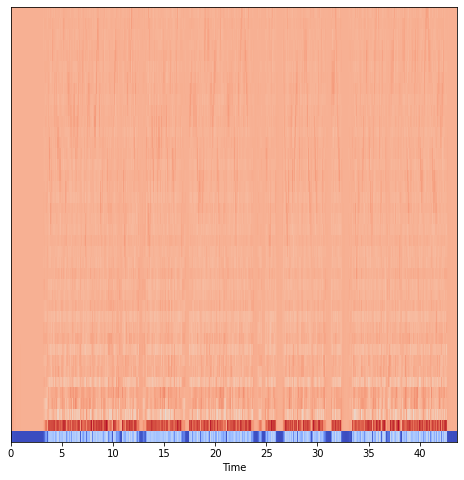

In [21]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('MFCCs.png')
plt.show('MFCCs')

In [52]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path=r"C:/Users/Acer/Documents/FYP/New folder"
metadata=pd.read_csv('C:/Users/Acer/Documents/FYP/metadata/metadata.csv')
metadata.head()

,ID,fold,WaveFileName,M(1)/F(0),class,classID
0,1,1,Paragraph 1.wav,0,ex,1
1,2,1,Paragraph 1_E3.wav,0,ex,1
2,3,2,Paragraph 2_E3.wav,0,ex,1
3,4,3,Paragraph 3.wav,0,ex,1
4,5,3,Paragraph 3_E3.wav,0,ex,1


In [53]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [54]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["WaveFileName"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    
    
    

0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Acer\\Documents\\FYP\\New folder\\fold1/Paragraph 1.wav'